In [1]:
import os
import json

from typing import List

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SRC = "tmp"

In [4]:
def get_files() -> List[str]:
    return [os.path.join(root, file) for root, _, files in os.walk(SRC) for file in files]

## Posts pre day per website

In [23]:
site_date_count = {}
site_date_ids = []
for file in get_files():
    site = file.split("/")[1]
    with open(file, "r") as f:
        data = json.load(f)
        key = (site, data["publish_date"])
        site_date_count[key] = site_date_count.get(key, 0) + 1
        site_date_ids.append((site, data["publish_date"], data["id"]))

In [24]:
(sites, dates), counts = zip(*list(site_date_count.keys())), site_date_count.values()
sites_dates_counts = pd.DataFrame({"site": sites, "date": dates, "count": counts})
sites_dates_counts["date"] = pd.to_datetime(sites_dates_counts["date"])

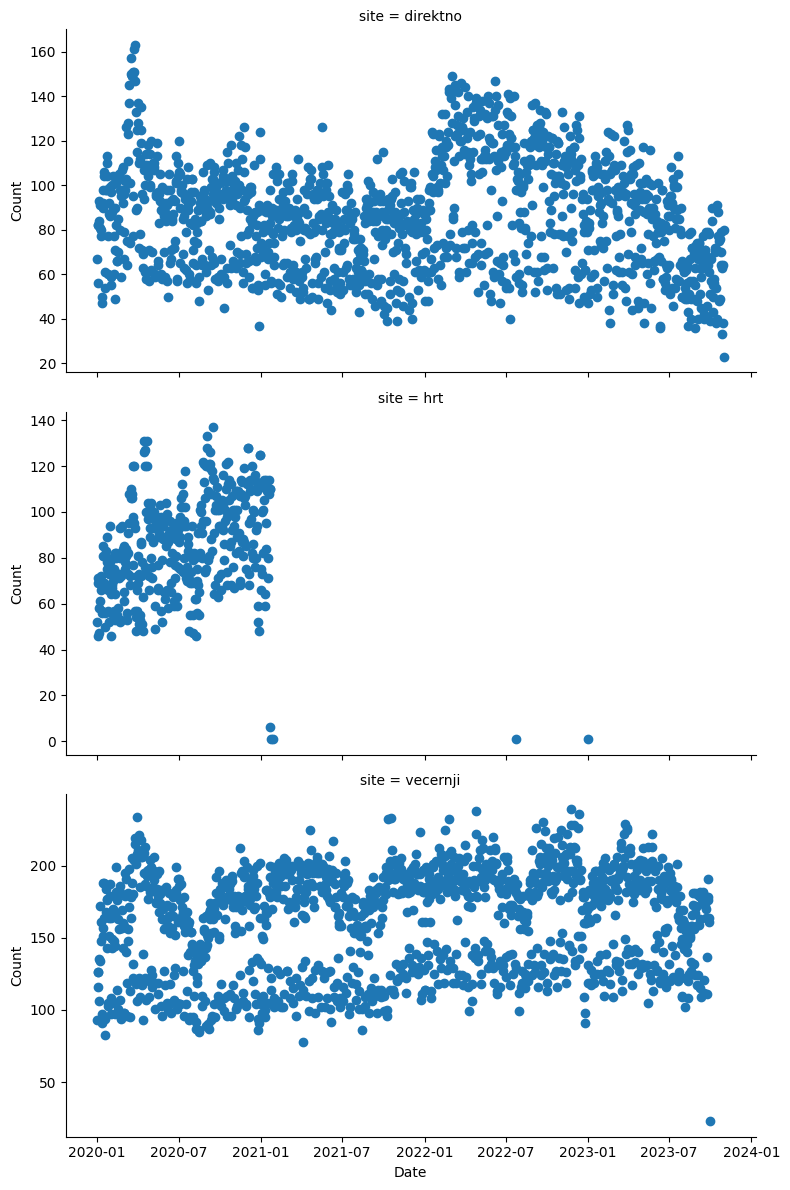

In [25]:
g = sns.FacetGrid(sites_dates_counts, row="site", height=4, aspect=2, sharey=False)
g.map(plt.scatter, "date", "count")
g.set_axis_labels("Date", "Count");

## Does Ids follow dates?

In [26]:
sites, dates, ids = zip(*site_date_ids)
sites_dates_ids = pd.DataFrame({"site": sites, "date": dates, "id": ids})
sites_dates_ids['date'] = pd.to_datetime(sites_dates_ids['date'])

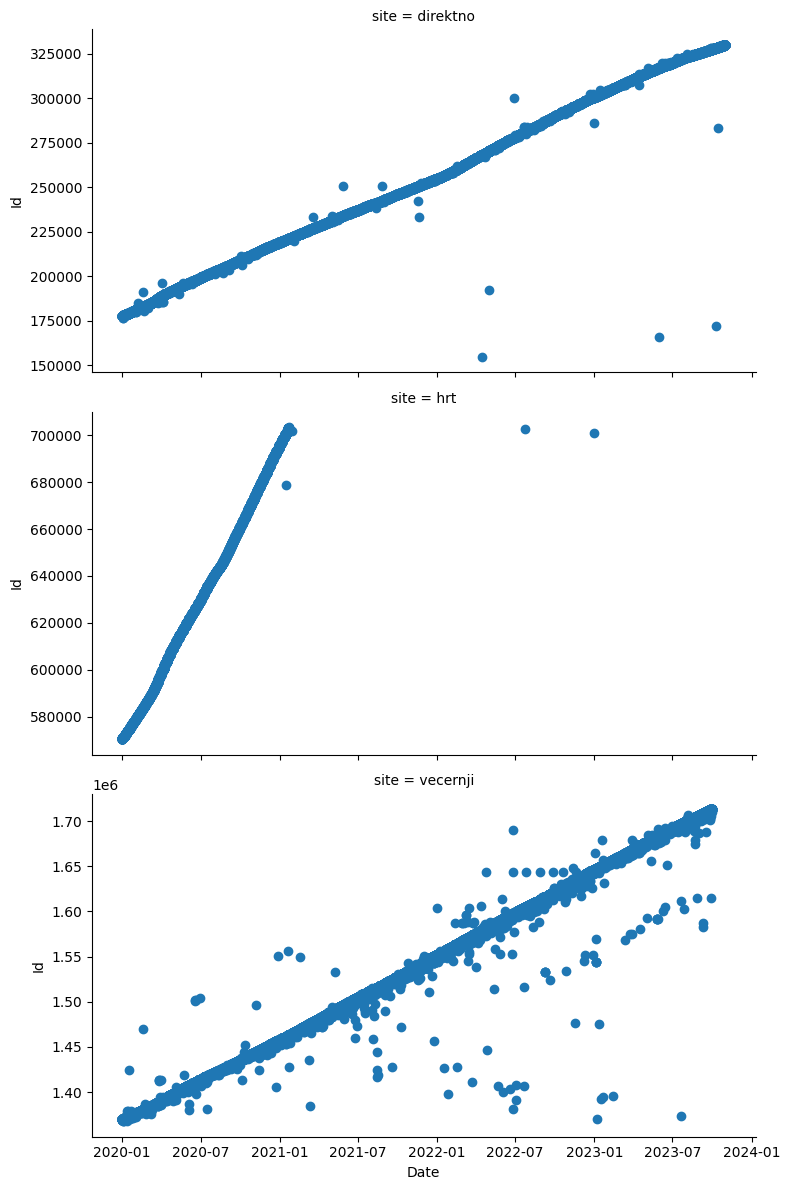

In [27]:
g = sns.FacetGrid(sites_dates_ids, row="site", height=4, aspect=2, sharey=False)
g.map(plt.scatter, "date", "id")
g.set_axis_labels("Date", "Id");